In [1]:
import pandas as pd
import numpy as np
from ast import literal_eval

## Merging Data

### Original Dataset

In [2]:
ds_all = pd.read_json('../data/train.json')
ds_all.head()

,document,full_text,tokens,trailing_whitespace,labels
0,7,Design Thinking for innovation reflexion-Avril...,"[Design, Thinking, for, innovation, reflexion,...","[True, True, True, True, False, False, True, F...","[O, O, O, O, O, O, O, O, O, B-NAME_STUDENT, I-..."
1,10,Diego Estrada\n\nDesign Thinking Assignment\n\...,"[Diego, Estrada, \n\n, Design, Thinking, Assig...","[True, False, False, True, True, False, False,...","[B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O, O..."
2,16,Reporting process\n\nby Gilberto Gamboa\n\nCha...,"[Reporting, process, \n\n, by, Gilberto, Gambo...","[True, False, False, True, True, False, False,...","[O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O..."
3,20,Design Thinking for Innovation\n\nSindy Samaca...,"[Design, Thinking, for, Innovation, \n\n, Sind...","[True, True, True, False, False, True, False, ...","[O, O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT..."
4,56,Assignment: Visualization Reflection Submitt...,"[Assignment, :, , Visualization, , Reflecti...","[False, False, False, False, False, False, Fal...","[O, O, O, O, O, O, O, O, O, O, O, O, B-NAME_ST..."


### Extended Dataset from Mistral

In [3]:
ds_external = pd.read_csv('../data/pii_dataset.csv', converters={
    'tokens': literal_eval,
    'labels': literal_eval,
    'trailing_whitespace': literal_eval
})
ds_external.rename(columns={'text': 'full_text'}, inplace=True)
ds_external = ds_external.iloc[:, :5]
ds_external.head()

,document,full_text,tokens,trailing_whitespace,labels
0,1073d46f-2241-459b-ab01-851be8d26436,"My name is Aaliyah Popova, and I am a jeweler ...","[My, name, is, Aaliyah, Popova,, and, I, am, a...","[True, True, True, True, True, True, True, Tru...","[O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O, O..."
1,5ec717a9-17ee-48cd-9d76-30ae256c9354,"My name is Konstantin Becker, and I'm a develo...","[My, name, is, Konstantin, Becker,, and, I'm, ...","[True, True, True, True, True, True, True, Tru...","[O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O, O..."
2,353da41e-7799-4071-ab20-d959b362612e,"As Mieko Mitsubishi, an account manager at a p...","[As, Mieko, Mitsubishi,, an, account, manager,...","[True, True, True, True, True, True, True, Tru...","[O, B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O..."
3,9324ee01-7bdc-41b1-a7a5-01307f72c20d,"My name is Kazuo Sun, and I'm an air traffic c...","[My, name, is, Kazuo, Sun,, and, I'm, an, air,...","[True, True, True, True, True, True, True, Tru...","[O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O, O..."
4,971fe266-2739-4f1b-979b-7f64e07d5a4a,"My name is Arina Sun, and I'm a dental hygieni...","[My, name, is, Arina, Sun,, and, I'm, a, denta...","[True, True, True, True, True, True, True, Tru...","[O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O, O..."


In [4]:
ds_all.document = ds_all.document.astype(int)
max_doc_id = ds_all.document.max()
print("Last doc id used:", max_doc_id)
ds_external.document = pd.Series(np.arange(max_doc_id+1, max_doc_id+1+len(ds_external)))

Last doc id used: 22687


In [5]:
ds_all = pd.concat([ds_all, ds_external], axis=0)
ds_all

,document,full_text,tokens,trailing_whitespace,labels
0,7,Design Thinking for innovation reflexion-Avril...,"[Design, Thinking, for, innovation, reflexion,...","[True, True, True, True, False, False, True, F...","[O, O, O, O, O, O, O, O, O, B-NAME_STUDENT, I-..."
1,10,Diego Estrada\n\nDesign Thinking Assignment\n\...,"[Diego, Estrada, \n\n, Design, Thinking, Assig...","[True, False, False, True, True, False, False,...","[B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O, O..."
2,16,Reporting process\n\nby Gilberto Gamboa\n\nCha...,"[Reporting, process, \n\n, by, Gilberto, Gambo...","[True, False, False, True, True, False, False,...","[O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O..."
3,20,Design Thinking for Innovation\n\nSindy Samaca...,"[Design, Thinking, for, Innovation, \n\n, Sind...","[True, True, True, False, False, True, False, ...","[O, O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT..."
4,56,Assignment: Visualization Reflection Submitt...,"[Assignment, :, , Visualization, , Reflecti...","[False, False, False, False, False, False, Fal...","[O, O, O, O, O, O, O, O, O, O, O, O, B-NAME_ST..."
...,...,...,...,...,...
4429,27117,"Hello, I'm Nicholas Moore, a man with a rich t...","[Hello,, I'm, Nicholas, Moore,, a, man, with, ...","[True, True, True, True, True, True, True, Tru...","[O, O, B-NAME_STUDENT, I-NAME_STUDENT, O, O, O..."
4430,27118,"Hello, my name is Alexey Novikov and I'm a psy...","[Hello,, my, name, is, Alexey, Novikov, and, I...","[True, True, True, True, True, True, True, Tru...","[O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O..."
4431,27119,"My name is Ludmila Inoue, and I'm a person wit...","[My, name, is, Ludmila, Inoue,, and, I'm, a, p...","[True, True, True, True, True, True, True, Tru...","[O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O, O..."
4432,27120,"Dr. Tu Garcia, a renowned dermatologist, embar...","[Dr., Tu, Garcia,, a, renowned, dermatologist,...","[True, True, True, True, True, True, True, Tru...","[O, B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O..."


### Saving combined Dataset

In [6]:
ds_all.to_csv('../data/combined_data.csv',index=False)

## EDA on Combined Dataset

In [67]:
data = pd.read_csv('../data/combined_data.csv'
                   , converters={'tokens': literal_eval
                                 , 'labels': literal_eval
                                 ,'trailing_whitespace': literal_eval
                                }
                  )
data.head

<bound method NDFrame.head of        document                                          full_text  \
0             7  Design Thinking for innovation reflexion-Avril...   
1            10  Diego Estrada\n\nDesign Thinking Assignment\n\...   
2            16  Reporting process\n\nby Gilberto Gamboa\n\nCha...   
3            20  Design Thinking for Innovation\n\nSindy Samaca...   
4            56  Assignment:  Visualization Reflection  Submitt...   
...         ...                                                ...   
11236     27117  Hello, I'm Nicholas Moore, a man with a rich t...   
11237     27118  Hello, my name is Alexey Novikov and I'm a psy...   
11238     27119  My name is Ludmila Inoue, and I'm a person wit...   
11239     27120  Dr. Tu Garcia, a renowned dermatologist, embar...   
11240     27121  Hello, I'm Badi Nakamura, and I work as a prog...   

                                                  tokens  \
0      [Design, Thinking, for, innovation, reflexion,...   
1      [D

### getting class labels

In [68]:
labels = data.labels.tolist()
cnt_labels = []
for x in labels:
    cnt_labels.extend(x)

print(pd.Series(cnt_labels).value_counts())

O                   6323308
B-NAME_STUDENT        12469
I-STREET_ADDRESS       8597
I-NAME_STUDENT         6763
B-EMAIL                3833
B-STREET_ADDRESS       3545
I-PHONE_NUM            3404
B-PHONE_NUM            2425
B-URL_PERSONAL          730
B-USERNAME              724
B-ID_NUM                 78
I-URL_PERSONAL            1
I-ID_NUM                  1
Name: count, dtype: int64


### Mapping BIO to Root form

In [69]:
target_labels = {'B-NAME_STUDENT':'NAME_STUDENT'
                 , 'I-NAME_STUDENT':'NAME_STUDENT'
                 , 'B-URL_PERSONAL':'URL_PERSONAL'
                 , 'I-URL_PERSONAL':'URL_PERSONAL'
                 , 'B-EMAIL':'EMAIL'
                 , 'I-EMAIL':'EMAIL'
                 , 'B-ID_NUM':'ID_NUM'
                 , 'I-ID_NUM':'ID_NUM'
                 , 'B-USERNAME':'USERNAME'
                 , 'I-USERNAME':'USERNAME'
                 , 'B-PHONE_NUM':'PHONE_NUM'
                 , 'I-PHONE_NUM':'PHONE_NUM'
                 , 'B-STREET_ADDRESS':'STREET_ADDRESS'
                 , 'I-STREET_ADDRESS':'STREET_ADDRESS'
                }

In [70]:
for i in range(len(labels)):
    for j in range(len(labels[i])):
        label = labels[i][j]
        if label == 'O':
            continue
        elif label in target_labels:
            labels[i][j] = target_labels[label]

In [71]:
cnt_labels = []
for x in labels:
    cnt_labels.extend(x)

count = pd.Series(cnt_labels).value_counts()[1:]

count

NAME_STUDENT      19232
STREET_ADDRESS    12142
PHONE_NUM          5829
EMAIL              3833
URL_PERSONAL        731
USERNAME            724
ID_NUM               79
Name: count, dtype: int64

### Frequency Distribution of Categorical Data

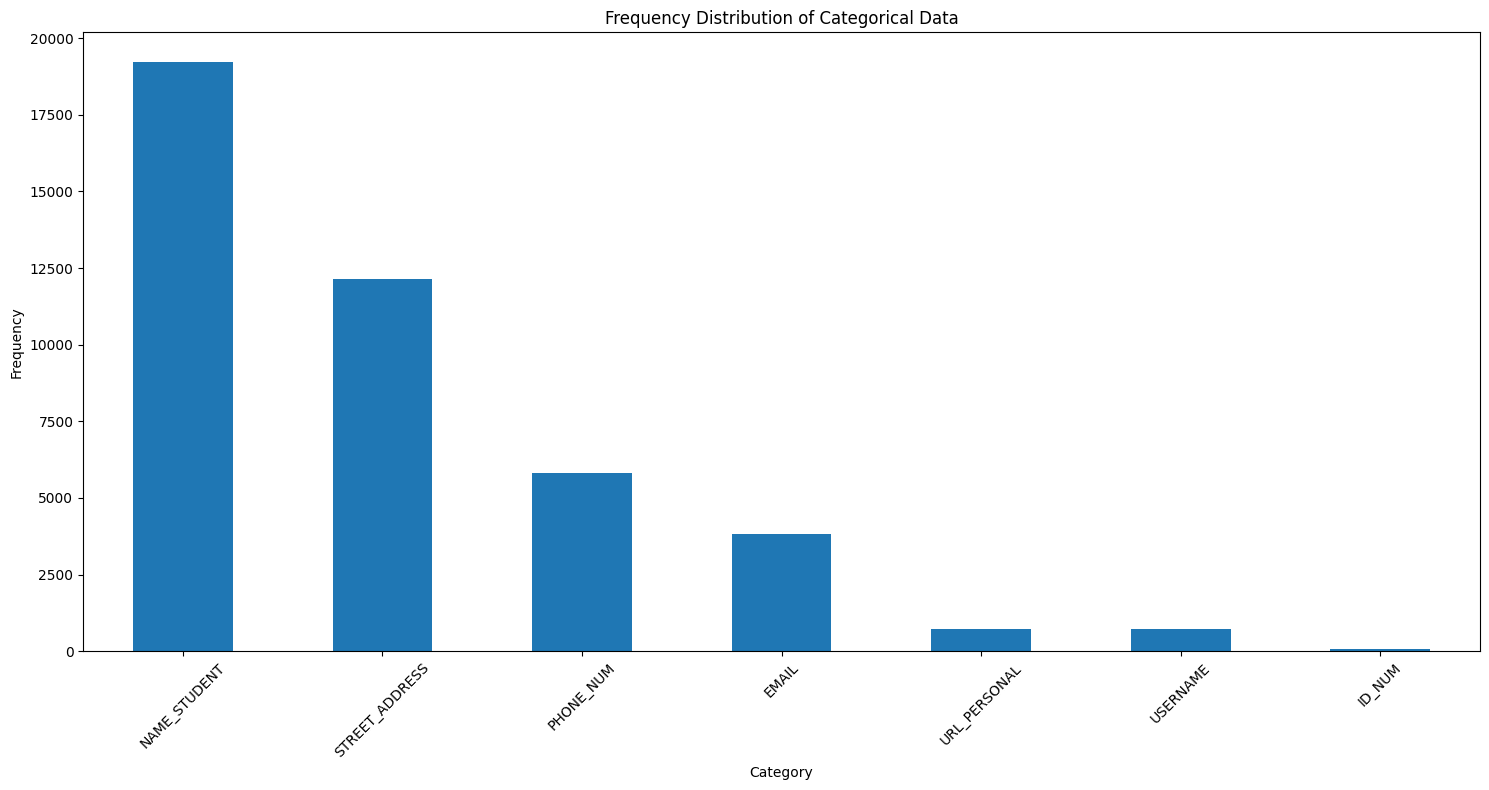

In [72]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
# Plot the frequency distribution
count.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Categorical Data')
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.tight_layout() 
plt.show()

### Token Length Distribution

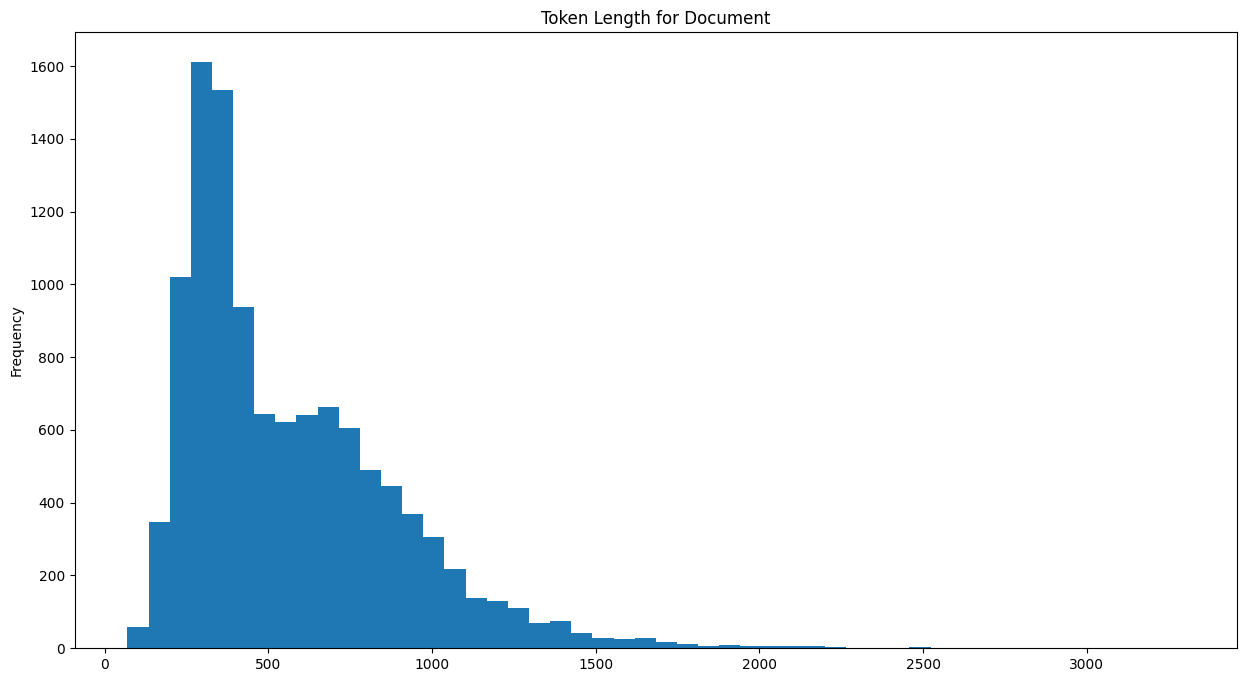

In [73]:
data['token_count'] = data['tokens'].apply(lambda x: len(x))
plt.figure(figsize=(15, 8))
data['token_count'].plot.hist(bins=50)
plt.title("Token Length for Document")
plt.grid(False)
plt.show()

## Removing rows with 0 non 'O' tokens

In [74]:
data1['is_labels'] = data1['labels'].apply(lambda labels: any(label != 'O' for label in labels))
ds_pos = data1[data1['is_labels']]
len(ds_pos)

5370

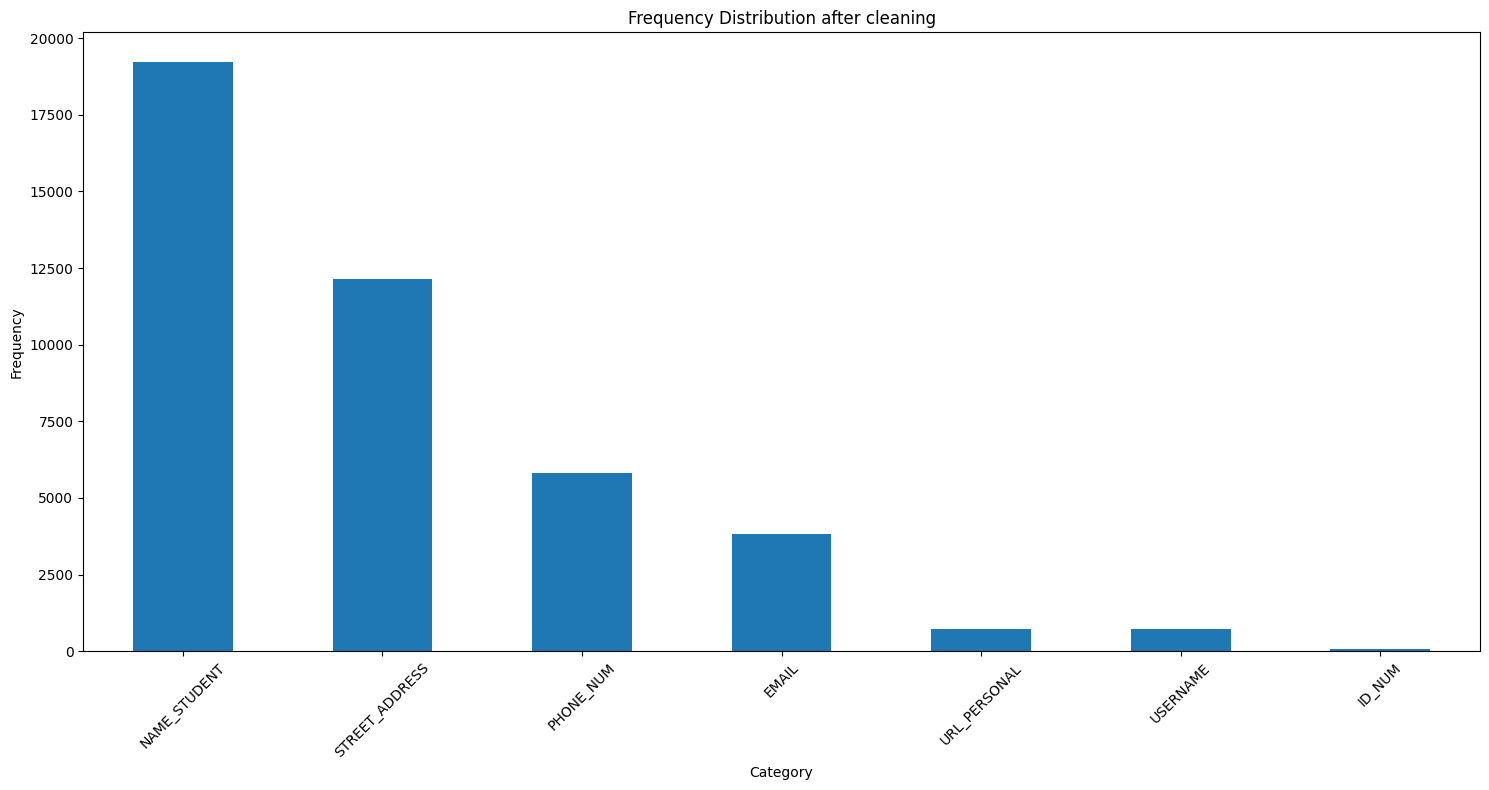

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
# Plot the frequency distribution
count.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Frequency Distribution after cleaning')
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.tight_layout() 
plt.show()

/var/folders/n8/b6_h9cbd1r3fjkr_2zjs39qw0000gn/T/ipykernel_62618/3974566369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_pos['token_count'] = ds_pos['tokens'].apply(lambda x: len(x))


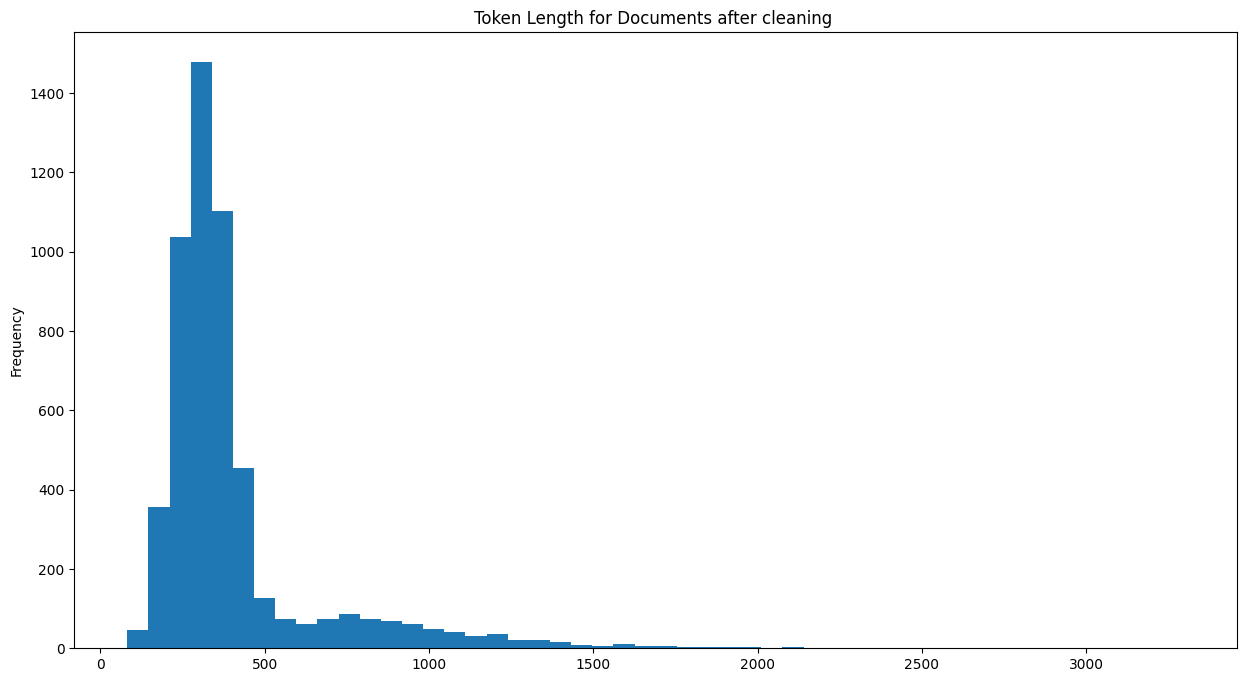

In [76]:
ds_pos['token_count'] = ds_pos['tokens'].apply(lambda x: len(x))
plt.figure(figsize=(15, 8))
ds_pos['token_count'].plot.hist(bins=50)
plt.title("Token Length for Documents after cleaning ")
plt.grid(False)
plt.show()